In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('trip.csv')

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


*  다양한 변수들을 활용하여 “택시 요금”을 예측한다는 가정하에 데이터를 정제해보세요.
지금까지 배운 내용을 최대한 활용하여 문제가 되는 부분을 찾아 정리하고, 최대한 변수들을 머신러닝 알고리즘에 활용 가능하도록 만들어봅시다.

In [6]:
# 결측치 판단 및 처리
# 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리합니다.
data.isna().mean()
data = data.dropna(subset=['fare_amount'])

In [7]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

<AxesSubplot:ylabel='passenger_count'>

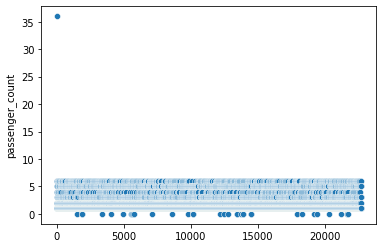

In [8]:
# 이상치 판단 및 처리
# 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거합니다.
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [25]:
from scipy.stats import zscore
import numpy as np

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

condition = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
 
data1 = data.drop(data[condition].index, axis=0)

/tmp/ipykernel_57/1230950528.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)


<AxesSubplot:ylabel='passenger_count'>

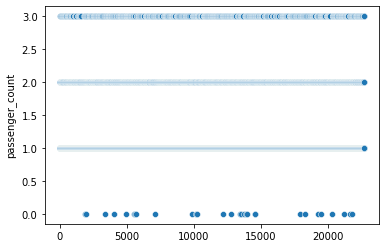

In [10]:
sns.scatterplot(x = data1.index, y = data1['passenger_count'])

<AxesSubplot:ylabel='trip_distance'>

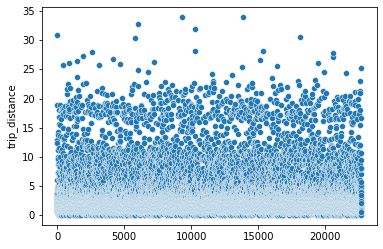

In [11]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

<AxesSubplot:ylabel='fare_amount'>

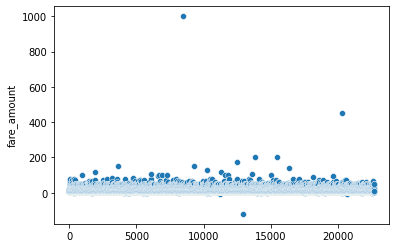

In [12]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

<AxesSubplot:ylabel='tip_amount'>

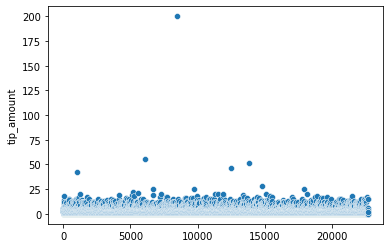

In [13]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

<AxesSubplot:ylabel='tolls_amount'>

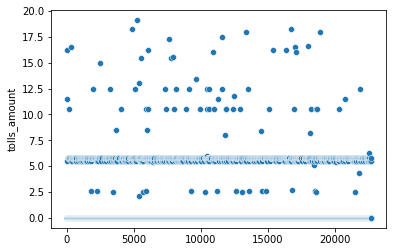

In [14]:
sns.scatterplot(x = data.index, y = data['tolls_amount'])

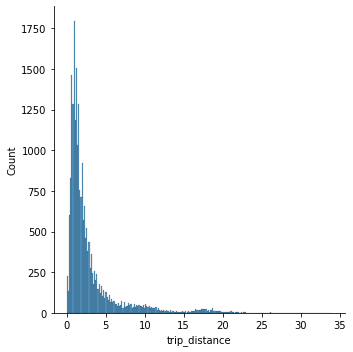

In [15]:
sns.displot(data['trip_distance'])

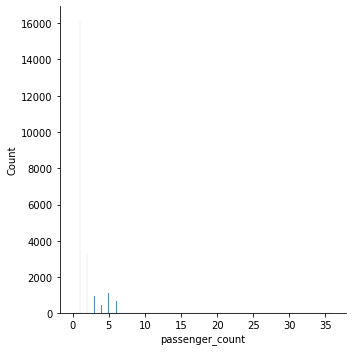

In [16]:
sns.displot(data['passenger_count'])

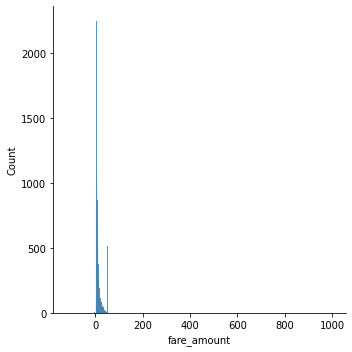

In [17]:
sns.displot(data['fare_amount'])

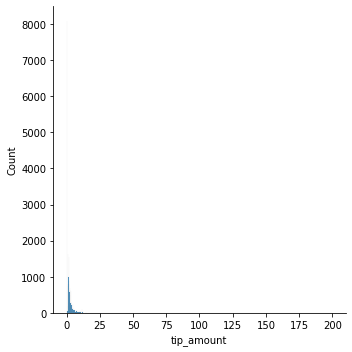

In [18]:
sns.displot(data['tip_amount'])

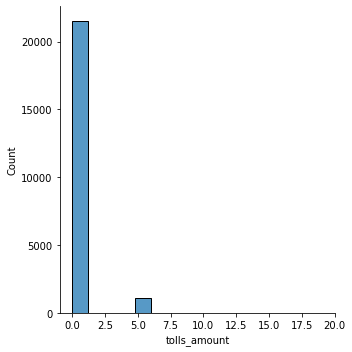

In [19]:
sns.displot(data['tolls_amount'])

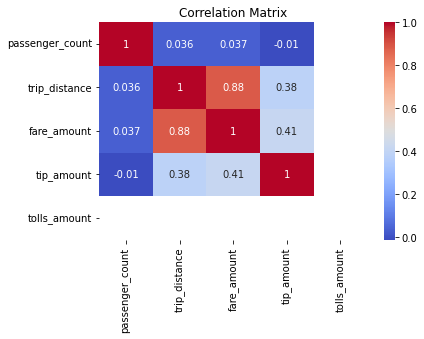

In [29]:
# 택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.
# 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠?
import seaborn as sns
import matplotlib.pyplot as plt

corr = data1.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [41]:
d_time = pd.to_datetime(data1['tpep_dropoff_datetime']) - pd.to_datetime(data1['tpep_pickup_datetime'])  
d_time.describe()

count                        17931
mean     0 days 00:13:45.207908092
std      0 days 00:56:03.544789947
min                0 days 00:00:00
25%                0 days 00:06:13
50%                0 days 00:10:05
75%                0 days 00:15:20
max                0 days 23:58:39
dtype: object

In [44]:
# Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.
data2 = data1['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})
data2.head(5)

1    Card
2    Card
4    Card
7    Card
8    Cash
Name: payment_method, dtype: object